# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold                #Provides train/test indices to split data in train/test sets
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from numpy import linalg
#from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
#SciPy optimize provides functions for minimizing (or maximizing) objective functions, 
#possibly subject to constraints. It includes solvers for nonlinear problems 
#(with support for both local and global optimization algorithms), 
#linear programing, constrained and nonlinear least-squares, root finding, and curve fitting.
import scipy.optimize as sco  
from itertools import cycle, islice  
#Iterator is defined as object types which contains values that can be accessed or iterated using a loop
from scipy import sparse
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from sklearn.neighbors import kneighbors_graph
#!pip install -q datascience                                         
#Package that is required by pandas profiling
#!pip install -q pandas-profiling   
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp  # Importing library for scientific calculations

import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import time

In [3]:
start_time=time.time()

In [4]:
df = pd.read_csv("obesity_chi2.csv")

In [5]:
df.sample(10)

,IDRSAge,Hlba1c,IDRSWithBMI,Age,IDRSWithBMIWC,IDRS,Weight,DiabetesSelfDecl,DiabetesCalc
1228,2,5.70000,4,50,5,5,88,1,1
6214,2,8.20000,10,54,11,9,68,0,0
779,2,9.70000,7,70,8,8,61,1,0
6113,2,8.70000,8,60,9,7,79,0,0
3816,1,5.70000,7,35,8,7,76,1,1
5470,1,7.90000,7,39,8,6,71,1,0
5722,1,7.20000,7,48,8,7,74,0,0
1039,2,5.90000,8,59,9,8,98,1,2
6305,2,7.40000,6,70,7,7,70,0,0
5458,1,6.00000,7,48,8,7,66,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDRSAge           7495 non-null   int64  
 1   Hlba1c            7495 non-null   float64
 2   IDRSWithBMI       7495 non-null   int64  
 3   Age               7495 non-null   int64  
 4   IDRSWithBMIWC     7495 non-null   int64  
 5   IDRS              7495 non-null   int64  
 6   Weight            7495 non-null   int64  
 7   DiabetesSelfDecl  7495 non-null   int64  
 8   DiabetesCalc      7495 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 527.1 KB


In [7]:
df = df.dropna(axis=0)

In [8]:
x=df.drop(['DiabetesCalc','Hlba1c','DiabetesSelfDecl'],axis=1)
y=df['DiabetesCalc']

In [9]:
np.any(np.isnan(y))

False

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
X_train,X_Val,y_train,y_Val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

# OverSampling the Imbalance Data Set

In [12]:
from imblearn.over_sampling import SMOTE
smote=SMOTE("minority")
X_train,y_train=smote.fit_resample(X_train,y_train)

## Creating Models

In [13]:
cat_features = []
print(cat_features)

[]


In [14]:
CB_start_time = time.time()

In [15]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_Val, y_Val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [16]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_Val, y_Val),
)

Learning rate set to 0.5
0:	learn: 1.0388445	test: 1.0627874	best: 1.0627874 (0)	total: 2.27ms	remaining: 20.5ms
1:	learn: 1.0155381	test: 1.0579555	best: 1.0579555 (1)	total: 4.12ms	remaining: 16.5ms
2:	learn: 1.0046328	test: 1.0569369	best: 1.0569369 (2)	total: 6.03ms	remaining: 14.1ms
3:	learn: 0.9999362	test: 1.0601694	best: 1.0569369 (2)	total: 7.82ms	remaining: 11.7ms
4:	learn: 0.9954653	test: 1.0636397	best: 1.0569369 (2)	total: 9.72ms	remaining: 9.72ms
5:	learn: 0.9918488	test: 1.0649248	best: 1.0569369 (2)	total: 11.6ms	remaining: 7.72ms
6:	learn: 0.9878902	test: 1.0654869	best: 1.0569369 (2)	total: 13.3ms	remaining: 5.71ms
7:	learn: 0.9867199	test: 1.0666424	best: 1.0569369 (2)	total: 15.1ms	remaining: 3.78ms
8:	learn: 0.9844679	test: 1.0667119	best: 1.0569369 (2)	total: 17ms	remaining: 1.89ms
9:	learn: 0.9819860	test: 1.0685385	best: 1.0569369 (2)	total: 18.8ms	remaining: 0us

bestTest = 1.056936903
bestIteration = 2

Shrink model to first 3 iterations.


In [17]:
y_val_keras_pr = clf.predict_proba(X_Val)

In [18]:
print(clf.predict(data=X_Val))

[[2]
 [0]
 [2]
 ...
 [0]
 [1]
 [1]]


In [19]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_Val, y_Val),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [20]:
y_pred=clf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')

Accuracy =  0.43829219479653103
-
[[102 124 231]
 [ 42 388 257]
 [ 58 130 167]]
-
              precision    recall  f1-score   support

           0       0.50      0.22      0.31       457
           1       0.60      0.56      0.58       687
           2       0.25      0.47      0.33       355

    accuracy                           0.44      1499
   macro avg       0.45      0.42      0.41      1499
weighted avg       0.49      0.44      0.44      1499

-


In [23]:
from sklearn.metrics import recall_score, precision_score

Text(0.5, 15.0, 'Predicted label')

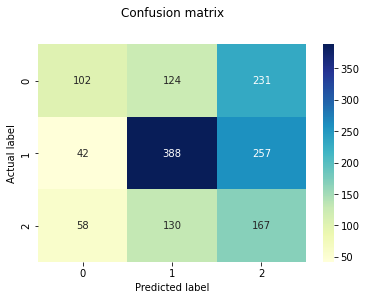

In [24]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [26]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [27]:
print(multiclass_roc_auc_score(y_test, y_pred))

0.5705068444607194


In [28]:
y_pred_keras_pr = clf.predict_proba(X_test)

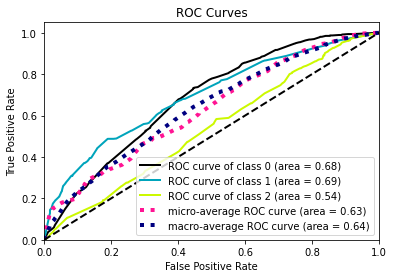

In [29]:
from sklearn.metrics import roc_curve
import scikitplot as skplt
plot = skplt.metrics.plot_roc(y_test, y_pred_keras_pr)

Text(0.5, 15.0, 'Predicted label')

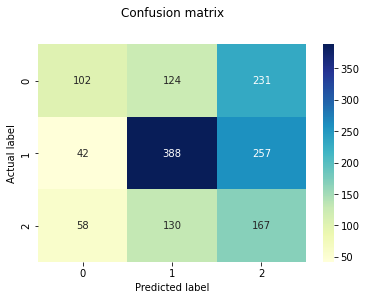

In [30]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.43829219479653103
              precision    recall  f1-score   support

           0       0.50      0.22      0.31       457
           1       0.60      0.56      0.58       687
           2       0.25      0.47      0.33       355

    accuracy                           0.44      1499
   macro avg       0.45      0.42      0.41      1499
weighted avg       0.49      0.44      0.44      1499



In [32]:
end_time=time.time()
cat_time= end_time-start_time
print("Time taken in minutes:",cat_time/60)

Time taken in minutes: 0.030723929405212402
